In [1]:
import datetime
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
from skimage.transform import resize, AffineTransform, warp
import shutil
import cv2
import matplotlib
import csv
import pandas
from sklearn.model_selection import train_test_split

In [2]:
dataset_path = 'data'
dataset_folder_list = os.listdir(dataset_path)
file_names = ['image_017_p020_t197_r096.png', 'image_018_p020_t209_r096.png',
               'image_019_p020_t220_r096.png' ,'image_020_p020_t232_r096.png', 'image_021_p020_t243_r096.png']
dataset_files_list = []
for dataset_folder_name in dataset_folder_list:
    for file_name in file_names:
        dataset_files_list.append(os.path.join(dataset_path, dataset_folder_name, 'renders', file_name))
print(len(dataset_files_list))

6980


In [8]:
# scale an array of images to a new size
def scale_images(images, new_shape):
    images_list = list()
    for _image in images:
        # resize with nearest neighbor interpolation
        new_image = resize(_image, new_shape, 0)
        # store
        images_list.append(new_image)
    return np.asarray(images_list)

row_images=[]
for dataset_file_name in dataset_files_list[:100]:
    if 'all_chair_names' not in dataset_file_name: 
        image=cv2.imread(dataset_file_name)
        # image = image[120:480,120:480]
        row_images.append(image)
        
row_images = np.array(row_images)
row_images = row_images.astype('float32')
# scaled_images =  scale_images(row_images, (128, 128))

In [9]:
row_images.shape

(100, 600, 600, 3)

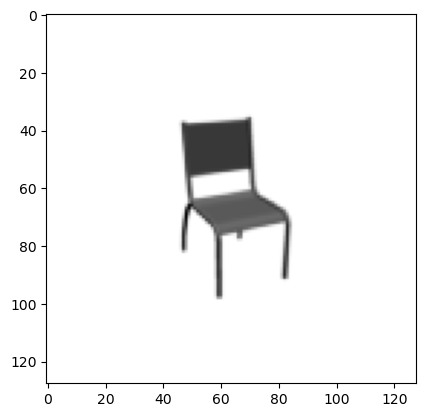

In [40]:
plt.imshow(scaled_images[9,:, :], cmap='gray')

In [41]:
#scale image values
normalized_images=scaled_images/255.0

expanded_normalized_images = np.expand_dims(normalized_images, axis=3)

print(np.shape(expanded_normalized_images))

np.random.shuffle(expanded_normalized_images)

print("training image value range: {", expanded_normalized_images.min(),"~",expanded_normalized_images.max(),"}")


np.save('./chair_train_128.npy', expanded_normalized_images.astype('float32'))

(6965, 128, 128, 1)
training image value range: { 0.0 ~ 1.0 }


In [ ]:


itest = expanded_normalized_images[:1000]
itrain = expanded_normalized_images[1000:-100]
ival = expanded_normalized_images[-100:]

print(np.shape(itrain))
print("train size: " + str(np.shape(itrain)[0]))
print("test size: " + str(np.shape(itest)[0]))
print("val size: " + str(np.shape(ival)[0]))
print("training image value range: {", itrain.min(),"~",itrain.max(),"}")

np.save('./biked_train_256.npy', itrain.astype('float32'))
np.save('./biked_test_256.npy', itest.astype('float32'))
np.save('./biked_val_256.npy', ival.astype('float32'))

In [4]:
scaled_images =  scale_images(row_images, (128, 256))

(6965, 128, 128)
raw image value range: { 0.0 ~ 255.0 }


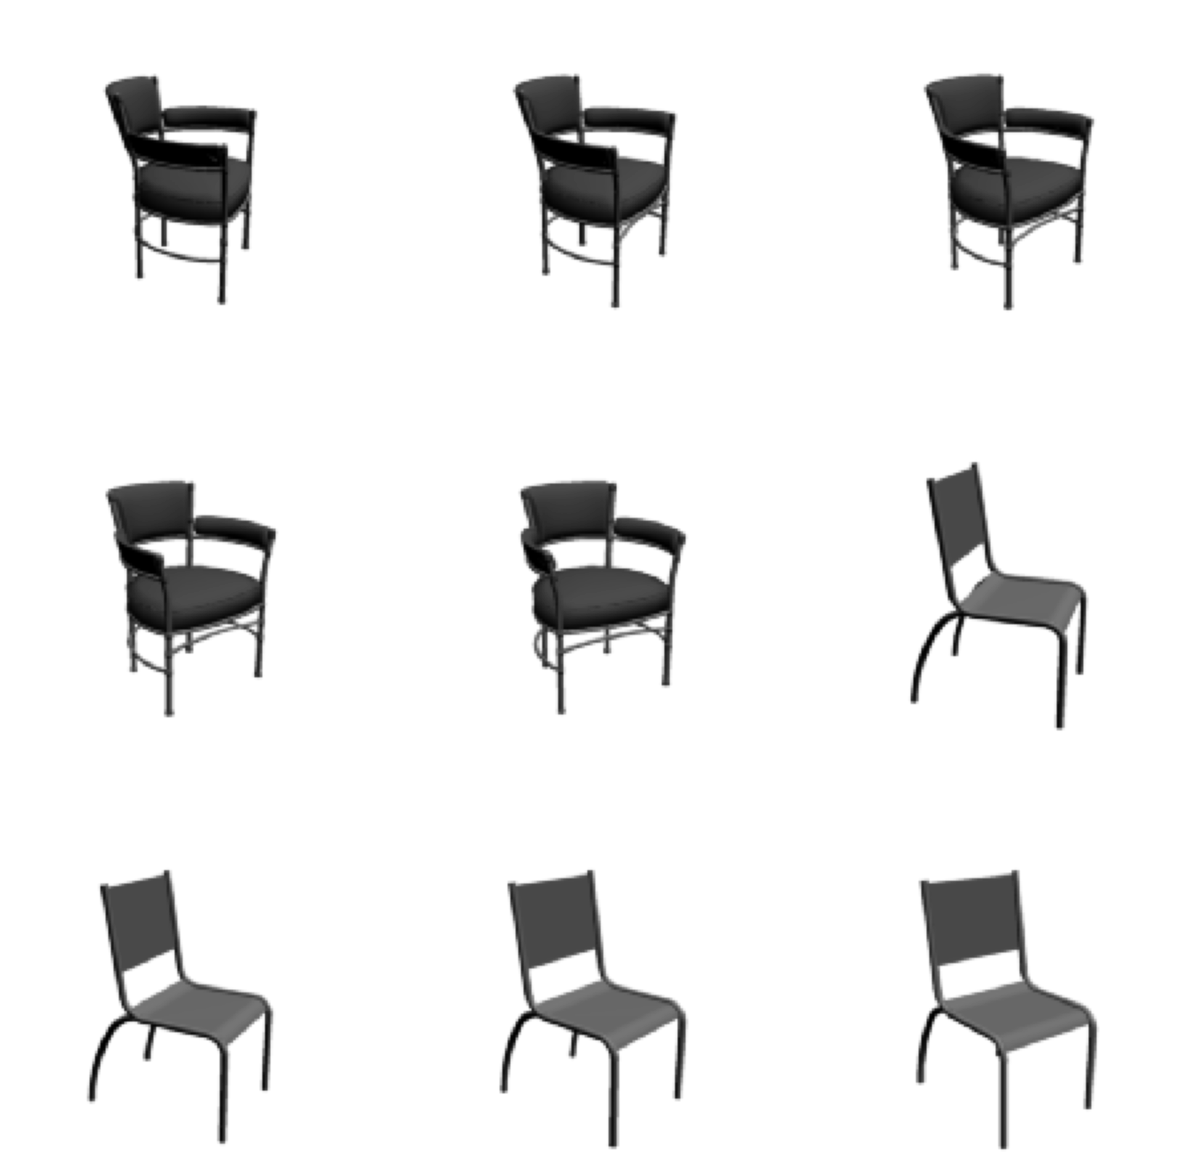

In [38]:
print(np.shape(scaled_images))
print("raw image value range: {", scaled_images.min(),"~",scaled_images.max(),"}")
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(scaled_images[i, :, :], cmap='gray')
    plt.axis('off')
# plt.savefig('../Outcome/raw_images.png')

(4512, 710, 1536)


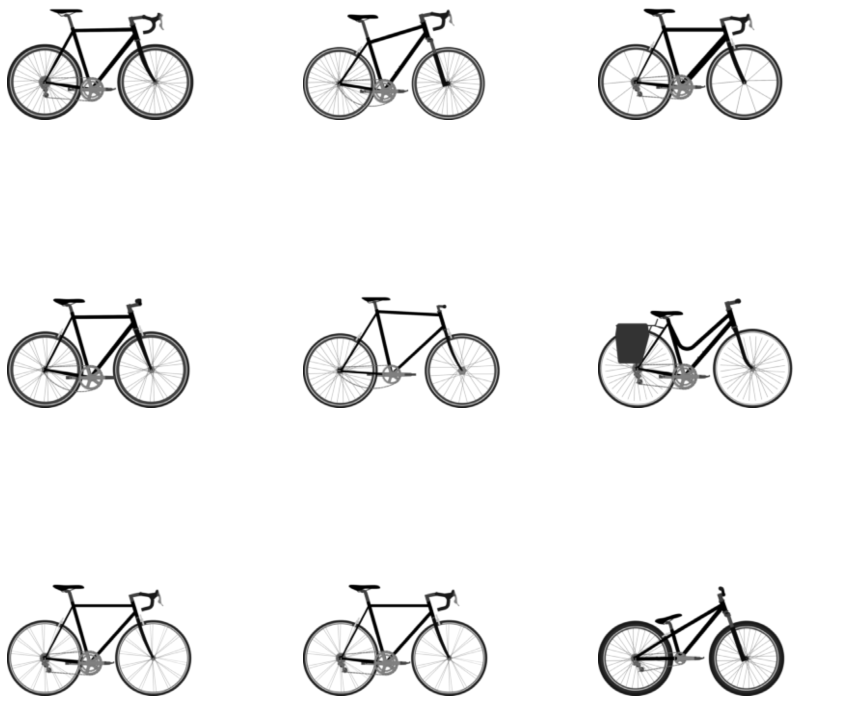

In [7]:

recovered_images =  scale_images(scaled_images, (710, 1536))
print(np.shape(recovered_images))
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(recovered_images[i, :, :], cmap='gray')
    plt.axis('off')

196
(4512, 710, 1340)


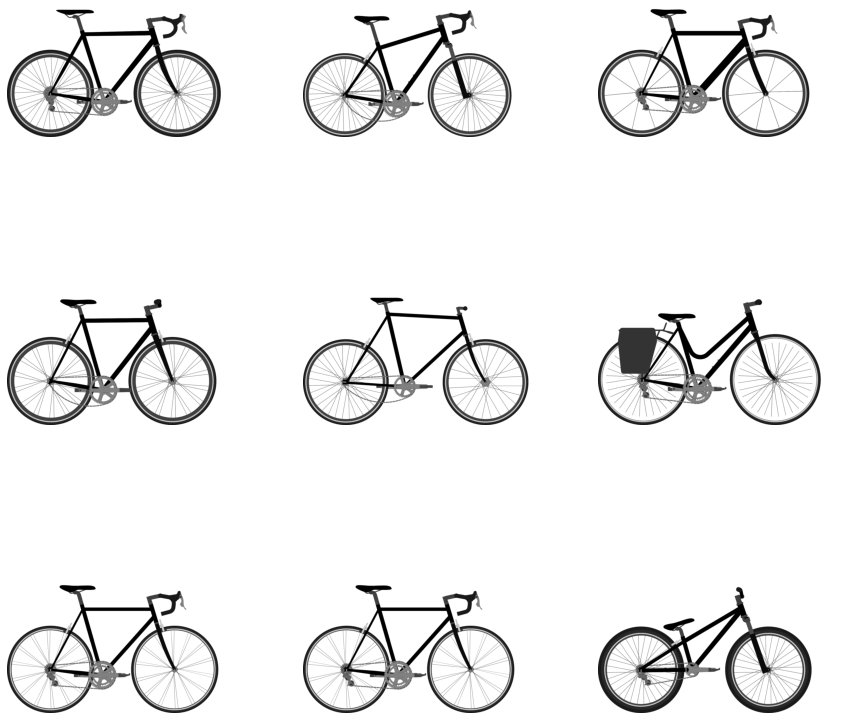

In [8]:
column_nr = 0
delete_column = True
while delete_column:
    column_nr += 1
    element_value = np.sum(row_images[:,:,-column_nr])/(np.shape(row_images)[0]*np.shape(row_images)[1])
    if element_value <= 254:
        delete_column = False

print(column_nr)    
cropped_images = row_images[:,:,:(np.shape(row_images)[2]-column_nr)]
print(np.shape(cropped_images))
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(cropped_images[i, :, :]/255, cmap='gray')
    plt.axis('off')
plt.savefig('../Outcome/cropped_images.png')